<a href="https://colab.research.google.com/github/whyeon92/6th-Intermediate/blob/Week3/Week3_%EC%A1%B0%EC%8A%B9%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️기존에 노션에서 작업하다가 노션 서버 오류로 인해 코랩으로 옮겨와 작업했습니다. 일부분 가독성이 떨어질 수 있다는 점 죄송합니다.

## 📌 3-5. 파이썬의 브로드캐스팅

: 파이썬에서 벡터 연산을 할 때, 벡터끼리 크기가 맞지 않아도 자동으로 맞춰서 계산해주는 기능
아래와 같이 행렬 내적과 같은 연산이 아닌 element에 대한 사칙연산을 적용할 때 행렬 하나하나의 크기를 맞춰주지 않아도 되어서 매우 편리함.

i) m * n 행렬과 1 * n 크기의 행벡터 사이의 연산 → 1 * n 크기의 행벡터를 m개까지 늘려 m * n크기로 만들어 계산해줌  
$$\begin{bmatrix}
 \ & \ & \ \\  \ & m \times n & \ \\ \ & \ & \
\end{bmatrix} \pm \begin{bmatrix}
\ & 1 \times n & \
\end{bmatrix} = \begin{bmatrix}
 \ & \ & \ \\  \ & m \times n & \ \\ \ & \ & \
\end{bmatrix} \pm \begin{bmatrix}
\ & 1 \times n & \ \\ \ & \vdots \\ \ & 1 \times n & \
\end{bmatrix}
$$

ii) m * n 행렬과 m * 1 크기의 열벡터 사이의 연산 → m * 1 크기의 열벡터를 n개까지 늘려 m * n크기로 만들어 계산해줌  
$$\begin{bmatrix}
 \ & \ & \ \\  \ & m \times n & \ \\ \ & \ & \
\end{bmatrix} \pm \begin{bmatrix}
 m \\  \times \\ 1
\end{bmatrix} = \begin{bmatrix}
 \ & \ & \ \\  \ & m \times n & \ \\ \ & \ & \
\end{bmatrix} \pm \begin{bmatrix}
 m & \ & m \\  \times & \cdots & \times \\ 1 & \ & 1
\end{bmatrix}
$$



iii) m * 1 과 같은 열/행 벡터와 Scalar c 사이의 연산 → c를 m * 1크기의 벡터로 만들어 계산 가능  
 $$ \begin{bmatrix}
 m \\  \times \\ 1
\end{bmatrix} \pm c =  \begin{bmatrix}
 m \\  \times \\ 1
\end{bmatrix} \pm  \begin{bmatrix}
 c \\  \vdots \\ c
\end{bmatrix} $$

## 📌 3-6. 파이썬과 넘파이 벡터

[브로드캐스팅의 장단점]
 + 유연하게 적용가능하기 때문에 한 줄의 코드로 많은 작업이 가능함.
 - 오히려 브로드캐스팅의 작동법을 제대로 모를 경우 이 유연성으로 인해 알 수 없는 에러가 나기도 함.

[그렇다면 이런 문제는 어떻게 해결하냐!!]
  → array의 크기를 잘 보고, rank가 1인 것은 사용을 피하자!
  * rank가 1인 array
      → shape가 (n, )와 같이 하나의 값만 나옴. 만약에 같은 array여도 이게 만약 rank가 2였다면 (n, 1)의 열벡터 또는 (1, n)의 행 벡터와 같이 나오게 되어있음.  
      → 행 벡터도 열 벡터도 아닌 이상한 형태로 결과를 볼때 직관적으로 보이지 않음.  
      → 그래서 그냥 초장부터 rank가 1인 애들은 rank가 2가 되도록 바꿔주는 게 좋음.

`#for a ndarray a,  \
assert(a.shape == (5, 1))  \
a.reshape((5, 1))`  
위에 언급한 바와 같이 array의 rank를 바꾸려면 reshape 함수를 통해 바꾼다.
 그리고 assert를 통해서는 array의 차원을 확인할 수 있다.

## 📌 3-7. Jupyter/iPython Notebooks 가이드

그냥… 평소에 쓰는 Jupyter Notebook이랑 다를 거 없다~ 그리고 난 코랩 쓸거임

## 📌 3-8. 로지스틱 회귀의 비용함수 설명  
지금까지 배운 로지스틱 회귀에 대해 정리하자면 다음과 같이 식들을 나열할 수 있다.

- $\hat y = \sigma (w^Tx + b)$
- $\sigma (z) = {1\over 1+e^{-z}}$
- If $y= 1: \ p(y|x) = \hat y$,  If   $y=0 : \ p(y|x) = 1 - \hat y$  즉, 주어진 x에서 y가 1일 확률이 y_hat, 0일 확률이 1 - y_hat이라고 생각하면 된다!
- 위의 두 경우를 하나의 식으로 표현하면,  $p(y|x) = \hat y^y \cdot (1 - \hat y )^{(1-y)}$
그리고 이 경우 y = 0, y = 1과 같이 경우를 나누어 생각하면 쉽게 풀리는 문제 각각의 경우를 식에 대입하면 위의 두 경우에 대한 식이 그대로 나옴
- 위에서 하나의 식으로 정의한 p(y|x)에 대해 로그를 취하며,
$log \ p(y|x) \ = \ log (\hat y^y \cdot (1 - \hat y)^{(1 - y)}) = ylog\hat y +(1 - y)log(1-\hat y)$  라는 식이 나오고, 이 시은 곧 앞선 로지스틱 회귀파트에서 정의한 손실함수의 음수값이 된다~!
- *왜 음수냐?? → 보통의 경우 정확도와 같은 성능을 ‘높이는’ 방향으로 머신러닝이 진행되는데 손실함수의 경우 작아질 수록 좋기 때문에 음수값을 취해 손실함수의 음수값을 ‘크게 만드는’ 방향으로 학습시키기 위함!   
  

위에서 정의한 애들은 다 하나의 샘플에서의 손실함수에 대한 얘기고, m개 샘플에 대해서 적용하려면??
-  $P(labels \ in\ training\ set) = \mathrm{\Pi}_{i = 1}^mP(y^{(i)}|x^{(i)})$ 각 label에 대해 iid라면 이렇게 비용함수 정리가 가능함. 그리고 이를 최소화할 때 로그를 씌워 로그의 최솟값을 찾는 방법을 쓸 수 있음.  
여기서 로그를 씌우면 다음과 같은 식이 나옴.  
$log(P(labels \ in\ training\ set)) = -\sum _{i=1}^mL(\hat y^{(i)}, y^{(i)})$  
  -> 결론적으로 비용함수를 다음과 같이 나타내는 게 가능해짐.  
  $J(w,b)= {1\over m }\sum _{i=1}^mL(\hat y^{(i)}, y^{(i)})$  
  m으로 나눈 건 스케일 맞추는 용.  
    
  요약하자면, 여기서 비용함수 J를 구했을 때 그게 최소가 되는 회귀 계수를 구하기 위해 MLE(Maximum Likelihood Estimator)를 쓴거다!

## 📌 4-1. 신경망 네트워크 개요

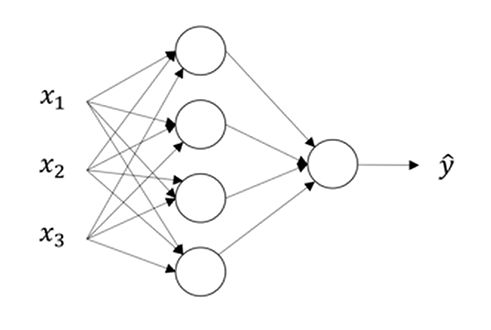

신경망은 그냥 앞서 배운 로지스틱회귀가 여러개가 있는거랑 비슷하다~  
그래서 이제 각각의 노드에서 결과를 내고 그걸 다시 또 다음 노드에 넣고 하는 식으로 만든다! 자세한 사항들은 이제 뒤에서 알아봄

## 📌 4-2. 신경망 네트워크의 구성 알아보기

Input Layer(입력층) : 피처를 입력받는 층

Hidden Layer(은닉층) : 기존의 로지스틱 회귀에선 없던 층으로 학습 데이터에서 볼 수 없던 층으로,
 입력 데이터를 받아서 중간에 분석에 이용할 새로운 데이터를 만들어내는 층이라고 생각할 수 있음
 정말 이름 그대로 안보이는 데이터를 만들어내는 층이랄까…?

Output Layer(출력층) : 최종 결과인 y를 출력해내는 층

활성값 : 어떤 층의 활성값은 그 층에 출력이 되는 값으로 다음 층에 넘겨주는 값,  
  ex) $a^{[1]}$ 는 은닉 1층(1st Hidden Layer)의 출력값으로, 해당 층의 활성값.

기존에 입력값 표기를 x로 했지만 이제부턴 a로 하기로 함

신경망의 층을 셀 때 특이한 점은 Input Layer는 층으로 치지 않아서 위의 그림과 같은 신경망은 3-1로 즉, 2Layer Neural Network(2층 신경망)라고 불린다는 것이다!  
  
그래서 위의 그림은 2층 신경망이고, 입력층은 x1, x2, x3 1층은 노드가 4개, 출력층은 노드가 1개인 신경망이다~

## 📌 4-3. 신경망 네트워크 출력의 계산

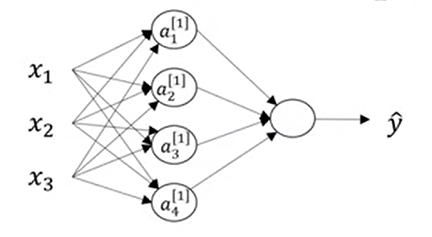

기존의 로지스틱 회귀는 은닉층이 없다고 가정하고 만들어낸 출력값, 그렇지만 신경망에선 n개의 은닉층이 있으므로 i번째 층의 j번째 노드의 출력값에 대해 지정해줄 필요가 있음. 다음과 같이 입력값에 대한 Notation 가능. (* 위에는 층 수 밑에는 노드 순서)  
$z_j^{[i]} = (w_j^{[i]})^T \cdot x + b_j^{[i]}$     →       $a_j^{[i]} = \sigma (z_j^{[i]})$  
이걸 계산해버리기 위해서는 for문을 사용하거나 벡터화 연산을 사용하는 방법이 있는데 저번에 배운 것처럼 당연히, 벡터화 연산이 훨씬 빠르니까 벡터화 연산을 쓴다.

## 📌 4-4. 많은 샘플에 대한 벡터화

$a^{[i](j)}$ -> i번째 레이어의 j번째 sample  
$z^{[1](k)} = (w^{[1]})^T \cdot x + b^{[1]}$     →       $a^{[1](k)} = \sigma (z^{[1](k)})$   
첫번째 레이어에서의 k example을 이렇게 쓸 수 있다~ 그리고 이걸 다음 층에 넣으면  
$z^{[2](k)} = (w^{[2]})^T \cdot x + b^{[2]}$     →       $a^{[2](k)} = \sigma (z^{[2](k)})$  이렇게가 된다!  
그리고 이 식에서 x, a, z를 하나의 샘플이 하나의 열이라고 생각하고 옆으로 이어붙여서 n개의 피처에 대한 m개의 샘플을 n*m 크기의 행렬로 나타내는 게 가능해지고,  
이렇게 되면 행렬 Z, A의 가로는 훈련 샘플의 번호가 되고, 세로는 신경망의 노드가 된다!  


## 📌 4-5. 벡터화 구현에 대한 설명

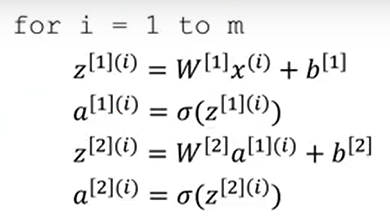

위에 있는 z, a를 모두 열로 만들어서 좌우로 붙여 행렬로 만들고 그거에 대해  
$z^{[1]} = (w^{[1]})^T \cdot x + b^{[1]} = z^{[1]} = (w^{[1]})^T \cdot A^{[0]} + b^{[1]}$  
이렇게 하면  
$z^{[2]}  = (w^{[2]})^T \cdot A^{[1]} + b^{[2]}$  이 식과 굉장히 유사해보임! 결국 딥러닝이 이걸 반복하는거다~

## 📌 코드 실습

In [1]:
import numpy as np

A = np.array([[56.0, 0.0, 4.4, 68.0],
              [1.2, 104.0, 52.0, 8.0],
              [1.8, 135.0, 99.0, 0.9]])

print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [2]:
cal = A.sum(axis = 0)  #axis = 0 -> 세로로 더해라!
print(cal)

[ 59.  239.  155.4  76.9]


In [3]:
percentage = 100*A/cal.reshape(1, 4)
#A는 3*4 행렬, cal은 1*4 행렬(reshape전에도 1*4지만 확실하게 하기 위해 사용.)
#그렇다면 여기선 3*4행렬을 1*4 행렬로 나눈것!
print(percentage)

[[94.91525424  0.          2.83140283 88.42652796]
 [ 2.03389831 43.51464435 33.46203346 10.40312094]
 [ 3.05084746 56.48535565 63.70656371  1.17035111]]
